In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import pandas as pd

In [30]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [32]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [33]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect =True)

In [34]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [35]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [36]:
# Create our session (link) from Python to the DB
session = Session(engine)
session.close()


In [37]:
# create inspecter and connect to engine
inspector = inspect(engine)

# Exploratory Climate Analysis

In [38]:
# identify table columns and their corresponding data type
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [39]:
# my trip dates
start_trip = '2018-08-01'
end_trip = '2018-08-10'

# latest date
last = session.query(Measurement.date).order_by(Measurement.date.desc()).first()


# Calculate the date 1 year ago from the last data point in the database
last_year = dt.datetime.strptime(last[0], '%Y-%m-%d')
previous = dt.date(last_year.year, last_year.month, last_year.day) - dt.timedelta(days=365)

print(f"Latest Date: {last[0]}")
print(f"Date 1 year from the last data point: {previous}")

Latest Date: 2017-08-23
Date 1 year from the last data point: 2016-08-23


In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
first_row = session.query(Measurement).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb20acf2590>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [41]:
# number of stations available in dataset
engine.execute('SELECT COUNT(*) FROM station').fetchall()


[(9,)]

In [42]:
# get Min and Max dates from measurment table
engine.execute('SELECT MIN(date), MAX(date) FROM measurement').fetchall()

[('2010-01-01', '2017-08-23')]

In [43]:
engine.execute("SELECT DISTINCT(s.name)FROM station s INNER JOIN measurement m ON s.station = m.station WHERE Date(m.date) >='2016-08-23' AND Date(m.date) <='2017-08-23'").fetchall()

[('WAIKIKI 717.2, HI US',),
 ('KANEOHE 838.1, HI US',),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US',),
 ('PEARL CITY, HI US',),
 ('WAIMANALO EXPERIMENTAL FARM, HI US',),
 ('WAIHEE 837.5, HI US',),
 ('MANOA LYON ARBO 785.2, HI US',)]

In [44]:
# April 17 to May 1 2017 table
search_string = f"SELECT s.station, s.name, s.latitude, s.longitude, m.date, m.prcp, m.tobs FROM station s INNER JOIN measurement m ON s.station = m.station WHERE Date(date) >='2017-04-17' AND Date(date) <='2017-05-01' and s.name LIKE 'KANEOHE%'"
engine.execute(search_string).fetchall()

[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-17', 0.41, 69.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-18', 0.08, 70.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-19', 0.02, 70.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-20', 0.33, 75.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-21', 1.16, 70.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-22', 1.01, 74.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-23', 0.02, 75.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-24', 0.0, 76.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-25', 0.0, 75.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-26', 0.0, 78.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-27', 0.1, 73.0),
 ('USC00513117', 'KANEOHE 838.1, HI 

In [45]:
last_year = f"SELECT m.date, m.prcp FROM station s INNER JOIN measurement m ON s.station = m.station  WHERE Date(m.date) >='2016-08-23' AND Date(m.date) <='2017-08-23' and s.name LIKE 'KANEOHE%'"
last_year_df = pd.DataFrame(engine.execute(last_year).fetchall())
last_year_df = last_year_df.rename(columns={0:"Date", 1:"Prcp"})
last_year_df.set_index("Date")
last_year_df= pd.DataFrame(last_year_df)

last_year_df

,Date,Prcp
0,2016-08-23,0.15
1,2016-08-24,2.15
2,2016-08-25,0.08
3,2016-08-26,0.03
4,2016-08-27,0.18
...,...,...
338,2017-07-27,0.00
339,2017-07-28,0.13
340,2017-07-29,0.06
341,2017-07-30,0.00


In [46]:
# create empty list
date = []
prcp = []

# loop through data table and append date/prcp
for dt in last_year_df['Date']:
    date.append(dt)
    
for prec in last_year_df['Prcp']:
    prcp.append(prec)

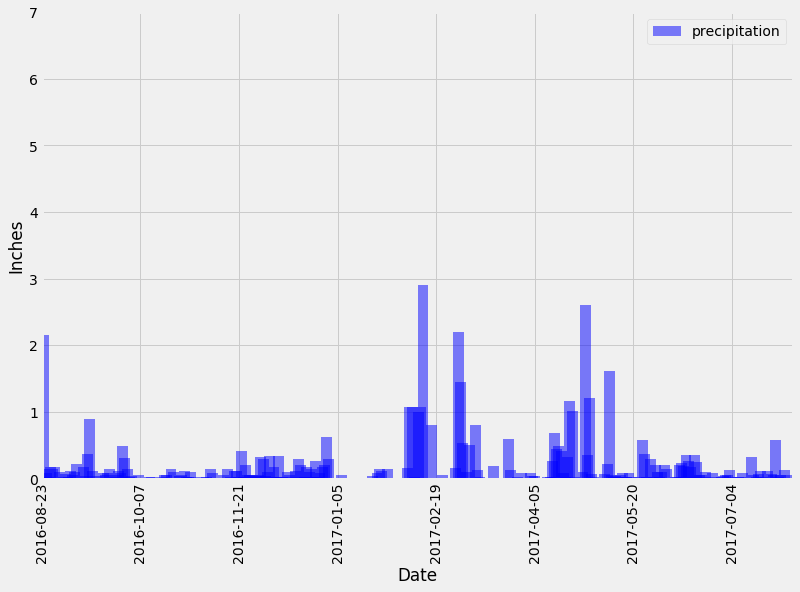

In [47]:
# Use Pandas Plotting with Matplotlib to plot the data
x = date
y = prcp

# Set x axis and tick locations
x_axis = np.arange(len(date))
tick_locations = [value+0.4 for value in x_axis]

# Set Figuresize/ chart type/ ticks/ limits/labels/legend/ save a picture and show
plt.figure(figsize=(12,8))
plt.bar(x, y,width=5, color='blue',alpha=0.5, align="center", label='precipitation')
ticks = np.arange(0,450,45)
plt.xticks(ticks, rotation=90)
plt.xlim("2016-08-23","2017-08-23")
plt.ylim(0,7)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.savefig("Images/precipitation.png")
plt.show()

In [48]:
# identify table columns and their corresponding data type
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [49]:
# Design a query to show how many stations are available in this dataset
total = session.query(Station.station).count()
total

9

In [23]:
# Find most active stations in descending order
sel = [Measurement.station, func.count(Measurement.station)]
station_descending = session.query(*sel)\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()

station_descending

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
data = session.query(func.min(Measurement.tobs),
                     func.max(Measurement.tobs),
                     func.avg(Measurement.tobs))\
             .filter(Measurement.station == station_descending[0][0]).all()

data

[(54.0, 85.0, 71.66378066378067)]

In [51]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
s = [Measurement.date, Measurement.tobs]
query_t = session.query(*s)\
    .filter(Measurement.date >= previous)\
    .filter(Measurement.station == station_descending[0][0]).all()

# sort data frame with date as index
sorted_df = pd.DataFrame(query_t, columns=['Date','Temperature'])
sorted_df = sorted_df.dropna(how='any')
sorted_df = sorted_df.sort_values(["Date"], ascending=True)
sorted_df = sorted_df.set_index("Date")

sorted_df

,Temperature
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


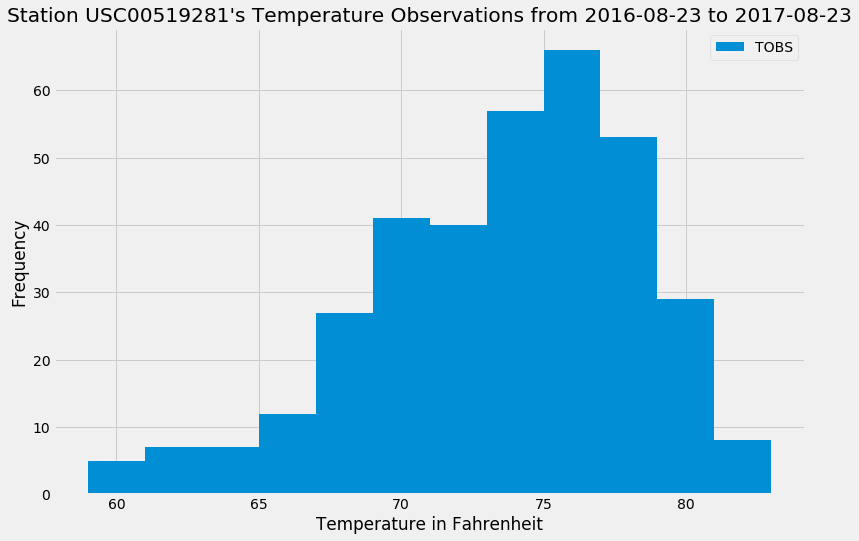

In [52]:
# Plot the results as a histogram
x = sorted_df["Temperature"].tolist()

# Size/histogram/labels/legend/save as picture/ title 
plt.figure(figsize=(12,8))
plt.hist(x, bins=12, label="TOBS")
plt.xlabel("Temperature in Fahrenheit")
plt.ylabel("Frequency")
plt.legend()
plt.title(f"Station {station_descending[0][0]}'s Temperature Observations from {previous} to {last[0]}")
plt.savefig("Images/histogram.png")
plt.show()